In [1]:
# Import of relevant libraries

import os
import pandas as pd

In [2]:
# Constants definition

DATASET_PATH = os.getenv("DATASET_PATH")
MODEL_PATH = os.getenv("MODEL_PATH")
METRICS_PATH = os.getenv("METRICS_PATH")

In [3]:
# Reading dataset

df = pd.read_csv(DATASET_PATH)

### 1 - Inspecting the dataset

Here, we'll be having a first visual into what are the datatypes, cleanliness of the dataset and class imbalance.

In [4]:
df.shape

(38000, 15)

In [5]:
df.head()

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,category
0,11394449,8324141,espirito santo,2,6,Mandala Espírito Santo,mandala mdf,2015-11-14 19:42:12,171.890000,1200.0,1,4,244,NaN,Decoração
1,15534262,6939286,cartao de visita,2,0,Cartão de Visita,cartao visita panfletos tag adesivos copos lon...,2018-04-04 20:55:07,77.670000,8.0,1,5,124,NaN,Papel e Cia
2,16153119,9835835,expositor de esmaltes,1,38,Organizador expositor p/ 70 esmaltes,expositor,2018-10-13 20:57:07,73.920006,2709.0,1,1,59,NaN,Outros
3,15877252,8071206,medidas lencol para berco americano,1,6,Jogo de Lençol Berço Estampado,t jogo lencol menino lencol berco,2017-02-27 13:26:03,118.770004,0.0,1,1,180,1.0,Bebê
4,15917108,7200773,adesivo box banheiro,3,38,ADESIVO BOX DE BANHEIRO,adesivo box banheiro,2017-05-09 13:18:38,191.810000,507.0,1,6,34,NaN,Decoração


Apart from the product and seller IDs, there seems to be all sorts of datatypes: 

- **strings**: `query`, `title` and `concatenated_tags`, 
- **numerical** (both integers and floats): `search_page`, `position`, `price`, `weight`, `minimum_quantity`, `view_counts` and `order_counts` - the latter already appearing to have some `NaN` values.
- **boolean**: `express_delivery`, besides being represented as a number, is a boolean
- **categorical**: target variable `category`
- **timestamp**: `creation_date`

Now let's understand a little more about NaN values.

In [6]:
df.isna().sum()

product_id               0
seller_id                0
query                    0
search_page              0
position                 0
title                    0
concatenated_tags        2
creation_date            0
price                    0
weight                  58
express_delivery         0
minimum_quantity         0
view_counts              0
order_counts         20105
category                 0
dtype: int64

There are 3 columns with NaN values: `concatenated_tags`, `weight` and `order_counts`.

Digging further into `order_counts`:

In [7]:
df.groupby('order_counts').count()

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,category
order_counts,,,,,,,,,,,,,,
1.0,981,981,981,981,981,981,981,981,981,981,981,981,981,981
2.0,699,699,699,699,699,699,699,699,699,699,699,699,699,699
3.0,514,514,514,514,514,514,514,514,514,514,514,514,514,514
4.0,425,425,425,425,425,425,425,425,425,425,425,425,425,425
5.0,424,424,424,424,424,424,424,424,424,424,424,424,424,424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1039.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1582.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [8]:
df.order_counts.unique()

array([      nan, 1.000e+00, 1.090e+02, 2.600e+01, 3.400e+01, 7.600e+01,
       3.300e+01, 2.000e+01, 1.500e+01, 5.000e+00, 3.600e+01, 2.500e+01,
       1.100e+01, 2.100e+01, 1.200e+01, 9.000e+00, 2.300e+01, 4.000e+01,
       1.600e+01, 4.200e+01, 1.700e+01, 2.000e+00, 4.000e+00, 3.700e+01,
       8.000e+00, 1.300e+01, 1.000e+01, 4.600e+01, 1.900e+01, 3.000e+00,
       6.350e+02, 7.000e+00, 1.760e+02, 2.200e+01, 5.000e+01, 4.300e+01,
       1.400e+01, 4.900e+01, 5.500e+01, 3.200e+01, 5.400e+01, 7.200e+01,
       2.800e+01, 3.000e+01, 9.100e+01, 2.400e+01, 1.380e+02, 1.420e+02,
       6.000e+00, 2.900e+01, 1.080e+02, 1.250e+02, 5.800e+01, 1.050e+02,
       1.120e+02, 1.070e+02, 5.900e+01, 1.800e+01, 3.100e+01, 7.100e+01,
       4.800e+01, 4.700e+01, 1.200e+02, 8.400e+01, 9.600e+01, 1.620e+02,
       5.200e+01, 6.300e+01, 6.100e+01, 2.890e+02, 2.390e+02, 2.700e+01,
       3.220e+02, 3.500e+01, 1.910e+02, 5.100e+01, 6.200e+01, 6.900e+01,
       6.000e+01, 3.800e+01, 5.600e+01, 1.300e+02, 

As it appears, there are no values equal to zero, so we might assume that those NaN values actually mean that those products were not ordered in the last 3 months - which makes sense considering the sparcity of Elo7's products.

So let's replace them for zeros.

Digging further into `weight`:

In [9]:
df[df.weight.isna()]

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,category
1764,15179518,2520540,sabonete,2,30,Sabonete líquido,sabonete sabonete liquido maternidade,2010-02-23 08:55:19,3.200000,NaN,0,15,104,NaN,Outros
2321,16688789,9060983,kit homenageados 15 anos,1,29,Kit homenageados pink e branco,15 anos,2012-10-28 21:16:10,24.310000,NaN,1,4,34,NaN,Lembrancinhas
2477,10145823,1417817,lembrancinha de casamento,4,15,lembrancinha de casamento,lembrancinhas,2012-08-07 21:05:36,14.030000,NaN,0,0,232,NaN,Lembrancinhas
4038,9797453,6000437,saco roupa suja,1,15,Saco para roupa suja,saco roupa suja,2011-09-01 05:44:28,35.340000,NaN,0,4,8,NaN,Outros
4115,10807030,139807,convite 90 anos,1,26,CONVITE DE 90 ANOS,convites personalizados 10x15,2012-09-23 09:43:45,12.060000,NaN,1,15,48,NaN,Papel e Cia
5257,12242119,431519,cartao de agradecimento cha de fraldas,1,3,TAG/MINI CARTÃO - CHÁ DE FRALDAS,bebes tags cartoes,2010-07-27 16:59:18,9.870000,NaN,1,34,104,NaN,Papel e Cia
5892,3301068,3058025,lembrancinha de maternidade diferente,1,12,"Lembrancinhas, aniversário, maternidade",lembrancinhas maternidade tata bloquinhos lemb...,2012-07-28 12:31:23,15.000000,NaN,1,24,962,NaN,Bebê
6532,12775302,10020204,cartao dia dos pais,1,2,Cartão Dia dos Pais,cartoes,2012-08-10 14:56:30,12.190000,NaN,1,0,228,NaN,Papel e Cia
7034,13613187,546025,tapete para banheiro de barbante,1,19,Tapetes de Barbantes,tapetes barbante decoracao tapete barbante,2012-05-28 10:12:27,243.340000,NaN,1,0,95,NaN,Decoração
7307,11038478,7879862,lembranca,1,37,LEMBRANÇA DE CASAMENTO,009 casamento lembranca casamento casamento,2011-03-29 17:01:00,12.950000,NaN,1,22,227,NaN,Outros


There is not a clearly outstanding pattern for the missing values. Although there are more advanced imputation techniques, let's replace them by the weight average on the dataset.

Also, for the `concatenated_tags`, let's replace the missing values with empty strings.

Making the said changes to the dataset, while keeping the original copy of it in case we need it:

In [10]:
df_clean = df.copy()

df_clean['order_counts'] = df_clean.order_counts.fillna(0)
df_clean['weight'] = df_clean.weight.fillna(df_clean.weight.mean())
df_clean['concatenated_tags'] = df_clean.concatenated_tags.fillna('')
df_clean.shape

(38000, 15)

In [11]:
df_clean.isna().sum()

product_id           0
seller_id            0
query                0
search_page          0
position             0
title                0
concatenated_tags    0
creation_date        0
price                0
weight               0
express_delivery     0
minimum_quantity     0
view_counts          0
order_counts         0
category             0
dtype: int64

Now let's check for class imbalance:

In [12]:
df_clean.groupby('category').count()

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts
category,,,,,,,,,,,,,,
Bebê,6930,6930,6930,6930,6930,6930,6930,6930,6930,6930,6930,6930,6930,6930
Bijuterias e Jóias,940,940,940,940,940,940,940,940,940,940,940,940,940,940
Decoração,8723,8723,8723,8723,8723,8723,8723,8723,8723,8723,8723,8723,8723,8723
Lembrancinhas,17524,17524,17524,17524,17524,17524,17524,17524,17524,17524,17524,17524,17524,17524
Outros,1133,1133,1133,1133,1133,1133,1133,1133,1133,1133,1133,1133,1133,1133
Papel e Cia,2750,2750,2750,2750,2750,2750,2750,2750,2750,2750,2750,2750,2750,2750


It is highly imbalanced! "Lembrancinhas" account for almost half of the products, while "Bijuterias e Jóias" seems to be pretty rare.

We shall keep it in mind while creating and evaluating the model.

### 2 - Creating the model

The model will be a simple one, a RandomForestClassifier.
For model creation, the approach chosen is to perform a GridSearch, looking into the `max_depth` parameter, which should help us avoid overfitting, and the `class_weight` parameter, which should help us deal with class imbalance.

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer

import scipy as sp

import matplotlib.pyplot as plt

**Choosing the features**: All numerical and boolean variables will be selected at first. We'll also include the `concatenated_tags` text variable, which at first sight seems to be the most category-related text variable. This variable will be turned into model features using a bag of words vectorization.

In [14]:
# Declaring the X and y columns
X_dense_columns = [
    'search_page',
    'position',
    'price',
    'weight',
    'minimum_quantity',
    'view_counts',
    'order_counts',
    'express_delivery'
]

X_text_columns = [
    'concatenated_tags'
]

X_columns = X_dense_columns + X_text_columns

y = df_clean.category


# Segregating training and testing
X_train, X_test, y_train, y_test = train_test_split(df_clean[X_columns],
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

**Generating the features from the text column**

In [15]:
# Turning the Series into a list
X_train_list = [word for word in X_train.concatenated_tags]
X_test_list = [word for word in X_test.concatenated_tags]

# Instanciating and fitting the CountVectorizer()
word_vector = CountVectorizer()
word_vector.fit(X_train_list)

# Transforming both the train and test sets with the vocabulary fitted
train_tags_sparse = word_vector.transform(X_train_list)
test_tags_sparse = word_vector.transform(X_test_list)

# Aggregating both the sparse matrix from the text features and the 
# dense matrix from other features
train_set = sp.sparse.hstack((train_tags_sparse,
                              X_train[X_dense_columns].values),format='csr')
test_set = sp.sparse.hstack((test_tags_sparse,
                             X_test[X_dense_columns].values),format='csr')

**Defining and training the model**

In [16]:
# Instanciating model
rf_model = RandomForestClassifier(random_state=0)

# Declaring a dictionary with the parameters to be searched
parameters = {
    'max_depth': [3,5,7,10],
    'class_weight': ['balanced', 'balanced_subsample'],
}

# Declaring all metrics we want the GridSearch to return
metrics = ['precision', 'recall']
kinds = ['micro', 'macro', 'weighted']
scores = [f'{metric}_{kind}' for metric in metrics for kind in kinds]
scores += ['accuracy']

# Instanciating Grid Search
gs = GridSearchCV(rf_model, 
                  param_grid=parameters, 
                  scoring=scores,
                  refit='precision_macro',
                  return_train_score=True,
                  verbose=3
                 )

Note that the parameter `refit` is set to `precision_macro`. This means that the GridSearch will return, of all models tested, the one that has the best test average on this metric. This metric was chosen because, since the dataset is highly imbalanced, we want it to generalize well for both the majorities and minorities class.

"Macro average precision" does not take into account the class size while being calculated, being simply the average on all classes' precisions - therefore, it weighs all classes as equals.

**Training the model** - it may take ~2 minutes

In [17]:
%%time

gs.fit(train_set, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END class_weight=balanced, max_depth=3; accuracy: (train=0.727, test=0.726) precision_macro: (train=0.590, test=0.581) precision_micro: (train=0.727, test=0.726) precision_weighted: (train=0.745, test=0.743) recall_macro: (train=0.677, test=0.665) recall_micro: (train=0.727, test=0.726) recall_weighted: (train=0.727, test=0.726) total time=   1.4s
[CV 2/5] END class_weight=balanced, max_depth=3; accuracy: (train=0.742, test=0.746) precision_macro: (train=0.591, test=0.598) precision_micro: (train=0.742, test=0.746) precision_weighted: (train=0.764, test=0.764) recall_macro: (train=0.668, test=0.675) recall_micro: (train=0.742, test=0.746) recall_weighted: (train=0.742, test=0.746) total time=   1.0s
[CV 3/5] END class_weight=balanced, max_depth=3; accuracy: (train=0.721, test=0.713) precision_macro: (train=0.583, test=0.569) precision_micro: (train=0.721, test=0.713) precision_weighted: (train=0.751, test=0.748) recal

[CV 4/5] END class_weight=balanced_subsample, max_depth=3; accuracy: (train=0.715, test=0.705) precision_macro: (train=0.565, test=0.563) precision_micro: (train=0.715, test=0.705) precision_weighted: (train=0.744, test=0.739) recall_macro: (train=0.653, test=0.640) recall_micro: (train=0.715, test=0.705) recall_weighted: (train=0.715, test=0.705) total time=   1.7s
[CV 5/5] END class_weight=balanced_subsample, max_depth=3; accuracy: (train=0.741, test=0.734) precision_macro: (train=0.598, test=0.595) precision_micro: (train=0.741, test=0.734) precision_weighted: (train=0.762, test=0.754) recall_macro: (train=0.677, test=0.662) recall_micro: (train=0.741, test=0.734) recall_weighted: (train=0.741, test=0.734) total time=   1.5s
[CV 1/5] END class_weight=balanced_subsample, max_depth=5; accuracy: (train=0.755, test=0.745) precision_macro: (train=0.639, test=0.611) precision_micro: (train=0.755, test=0.745) precision_weighted: (train=0.773, test=0.762) recall_macro: (train=0.691, test=0.

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_depth': [3, 5, 7, 10]},
             refit='precision_macro', return_train_score=True,
             scoring=['precision_micro', 'precision_macro',
                      'precision_weighted', 'recall_micro', 'recall_macro',
                      'recall_weighted', 'accuracy'],
             verbose=3)

In [18]:
print(f'The best model has the following parameters:')
print(gs.best_params_)

The best model has the following parameters:
{'class_weight': 'balanced_subsample', 'max_depth': 10}


Manually inspecting the results:

In [19]:
splits = ['test', 'train']
stats = ['mean', 'std']
best_model_index = gs.best_index_

wanted_results = [f'{stat}_{split}_{score}' for score in scores for stat in stats for split in splits]
cv_results = gs.cv_results_

for result in wanted_results:
    print(f'{result}: {cv_results.get(result)[best_model_index]}')    

mean_test_precision_micro: 0.7693984962406014
mean_train_precision_micro: 0.7817763157894737
std_test_precision_micro: 0.006792349868312369
std_train_precision_micro: 0.00460549331939811
mean_test_precision_macro: 0.6467528124835716
mean_train_precision_macro: 0.6708475496303536
std_test_precision_macro: 0.015428468725071238
std_train_precision_macro: 0.012601727759562672
mean_test_precision_weighted: 0.781320061091028
mean_train_precision_weighted: 0.7931318879800421
std_test_precision_weighted: 0.005538956769421738
std_train_precision_weighted: 0.004112487056253051
mean_test_recall_micro: 0.7693984962406014
mean_train_recall_micro: 0.7817763157894737
std_test_recall_micro: 0.006792349868312369
std_train_recall_micro: 0.00460549331939811
mean_test_recall_macro: 0.7040905249898948
mean_train_recall_macro: 0.7326213648899074
std_test_recall_macro: 0.00916937541649382
std_train_recall_macro: 0.008427604746027289
mean_test_recall_weighted: 0.7693984962406014
mean_train_recall_weighted: 0.

Train and test metrics are relatively close, which indicates low overfitting risk.
Despite treating for class imbalance with a balanced subsample method, we still note that the 'weighted' metrics are still better than the 'macro' ones - however, they are sufficiently close, and we'll check the model's capacity to generalize on the test set later on.

**Testing the model**

In [20]:
# Classification report on the train and test sets
y_pred_train = gs.predict(train_set)
train_report = classification_report(y_train, y_pred_train)
print('Train Metrics: \n')
print(train_report)
print()

y_pred_test = gs.predict(test_set)
test_report = classification_report(y_test, y_pred_test)
print('Test Metrics: \n')
print(test_report)

Train Metrics: 

                    precision    recall  f1-score   support

              Bebê       0.85      0.70      0.77      4873
Bijuterias e Jóias       0.88      0.90      0.89       637
         Decoração       0.75      0.84      0.79      6114
     Lembrancinhas       0.87      0.86      0.87     12289
            Outros       0.40      0.62      0.49       791
       Papel e Cia       0.56      0.50      0.53      1896

          accuracy                           0.80     26600
         macro avg       0.72      0.74      0.72     26600
      weighted avg       0.80      0.80      0.80     26600


Test Metrics: 

                    precision    recall  f1-score   support

              Bebê       0.82      0.69      0.75      2057
Bijuterias e Jóias       0.83      0.85      0.84       303
         Decoração       0.73      0.82      0.78      2609
     Lembrancinhas       0.86      0.85      0.86      5235
            Outros       0.35      0.56      0.43       342
  

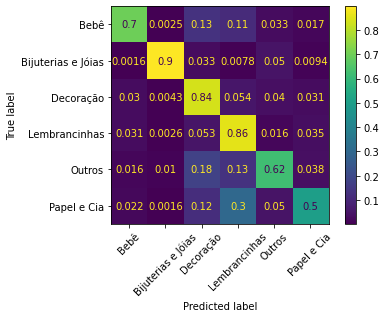

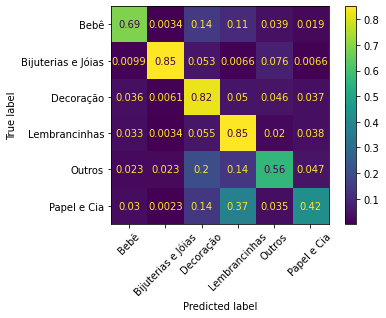

In [21]:
# Plotting confusion matrices for train and test sets
plot_confusion_matrix(gs, train_set, y_train, xticks_rotation=45, normalize='true');
plot_confusion_matrix(gs, test_set, y_test, xticks_rotation=45, normalize='true');

The model naturally loses some performance on the test set, but is still pretty close to the CV-test results - or even higher than the CV-train in some metrics!

Curiously, one of the classes it goes better is the one with the least support, `Bijuterias e Jóias`, having a poorer performance on `Outros` and `Papel e Cia`.

For now, we can consider this to be the chosen model!

**Exporting the metrics**

Since the GridSearchCV does not return the metrics per class, I will be using the classification_report to do that job.

In [22]:
train_title = 'Train metrics:\n'
test_title = '\n\nTest metrics:\n'

metrics_report = train_title + train_report + test_title + test_report
print(metrics_report)

with open(METRICS_PATH, "w") as f:
    f.write(metrics_report)

Train metrics:
                    precision    recall  f1-score   support

              Bebê       0.85      0.70      0.77      4873
Bijuterias e Jóias       0.88      0.90      0.89       637
         Decoração       0.75      0.84      0.79      6114
     Lembrancinhas       0.87      0.86      0.87     12289
            Outros       0.40      0.62      0.49       791
       Papel e Cia       0.56      0.50      0.53      1896

          accuracy                           0.80     26600
         macro avg       0.72      0.74      0.72     26600
      weighted avg       0.80      0.80      0.80     26600


Test metrics:
                    precision    recall  f1-score   support

              Bebê       0.82      0.69      0.75      2057
Bijuterias e Jóias       0.83      0.85      0.84       303
         Decoração       0.73      0.82      0.78      2609
     Lembrancinhas       0.86      0.85      0.86      5235
            Outros       0.35      0.56      0.43       342
      

**Exporting the model**

For exporting the final model, we'll train the chosen model with all available data, including both train and test sets.    

In [24]:
# Getting final features
X_final = df_clean[X_columns]

# Fitting a new Vectorizer and getting the final dataset
X_final_list = [word for word in X_final.concatenated_tags]

word_vector_final = CountVectorizer()
final_tags_sparse = word_vector_final.fit_transform(X_final_list)

final_train_set = sp.sparse.hstack((final_tags_sparse,
                                    X_final[X_dense_columns].values),format='csr')

# Instanciating and training the model
final_model = RandomForestClassifier(random_state=0, 
                                     class_weight=gs.best_params_['class_weight'],
                                     max_depth=gs.best_params_['max_depth'],
                                    )
final_model.fit(final_train_set, y)

# Exporting the model
import pickle
with open(MODEL_PATH, 'wb') as f:
    pickle.dump(final_model, f, pickle.HIGHEST_PROTOCOL)